# Projeção de dados alguns dados não sei ainda

## Inicializando variáveis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nbformat
import statsmodels.api as sm
from multidata import *

In [2]:
def errordiff(result_a, result_b):
    errors = []
    columns_a, columns_b = result_a.columns.values, result_b.columns.values
    size_a, size_b = len(columns_a), len(columns_b)
    for i in range(0, size_a, 2):
        if columns_a[i] in columns_b:
            error_a = sm.tools.eval_measures.mse(result_a[columns_a[i]], result_a[columns_a[i] + ' projetado'], axis=0)
            error_b = sm.tools.eval_measures.mse(result_b[columns_a[i]], result_b[columns_a[i] + ' projetado'], axis=0)
            errors.append([columns_a[i], error_a, error_b, error_a/error_b])
    return errors

In [3]:
%run ../Limpezas/limpeza_análise_energética.ipynb

In [4]:
df = MultiData(dict_analise_energetica)

In [5]:
print(df)

Produção_de_Energia_Primária | Produção_de_Energia_Primária_% | Oferta_Interna_de_Energia | Oferta_Interna_de_Energia_% | Consumo_Final_por_Fonte | Consumo_Final_por_Fonte_% | Consumo_Final_por_Setor | Consumo_Final_por_Setor_% | Consumo_Final_Energético_por_Fonte | Consumo_Final_não_Energético_por_Fonte | Dependência_Externa_de_Energia | Composição_Setorial_do_Consumo_de_Derivados_de_Petróleo | Composição_Setorial_do_Consumo_de_Eletricidade | Composição_Setorial_do_Consumo_de_Carvão_Vapor | Composição_Setorial_do_Consumo_Final_de_Biomassa


In [6]:
print(df[6].columns.values)

['CONSUMO FINAL' 'CONSUMO FINAL NÃO-ENERGÉTICO' 'CONSUMO FINAL ENERGÉTICO'
 'SETOR ENERGÉTICO' 'RESIDENCIAL' 'COMERCIAL' 'PÚBLICO' 'AGROPECUÁRIO'
 'TRANSPORTES - TOTAL' 'RODOVIÁRIO' 'FERROVIÁRIO' 'AÉREO' 'HIDROVIÁRIO'
 'INDUSTRIAL - TOTAL' 'CIMENTO' 'FERRO-GUSA E AÇO' 'FERRO-LIGAS'
 'MINERAÇÃO E PELOTIZAÇÃO' 'NÃO-FERROSOS E OUTROS DA METALURGIA' 'QUÍMICA'
 'ALIMENTOS E BEBIDAS' 'TÊXTIL' 'PAPEL E CELULOSE' 'CERÂMICA' 'OUTROS']


## Análise e projeção de produção de energia primária

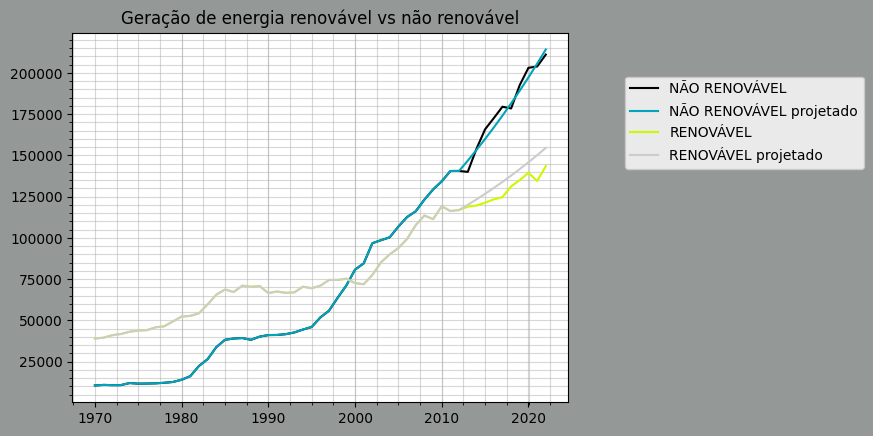

In [7]:
proj1 = df.projection_var(2012, [(0, 'NÃO RENOVÁVEL'),
                               (0, 'RENOVÁVEL')],
                               'Geração de energia renovável vs não renovável')

##### O modelo não teve uma previsão tão boa, apesar de seguir bem a tendência central da variação

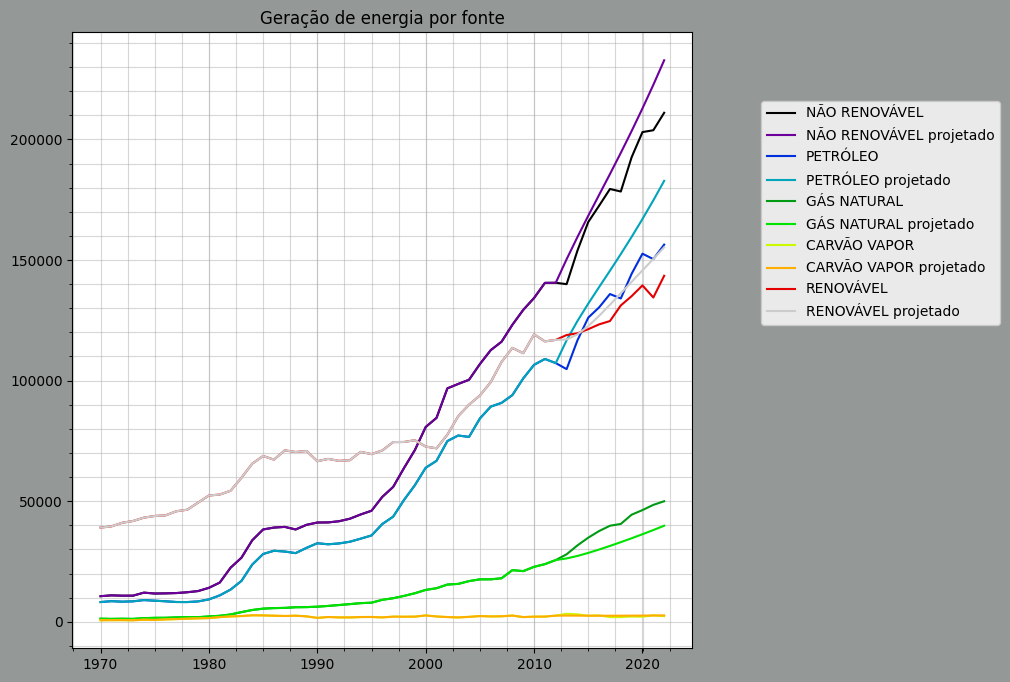

In [8]:
proj2 = df.projection_var(2012, [(0, 'NÃO RENOVÁVEL'),
                               (0, 'PETRÓLEO'),
                               (0, 'GÁS NATURAL'),
                               (0, 'CARVÃO VAPOR'),
                               (0, 'RENOVÁVEL'),
                               ],
                               'Geração de energia por fonte')

##### Esse modelo se saiu aparentemente melhor nas projeções que estávamos tentando anteriormente, mas para ter certeza, comparar utilizando a métrica MSE (Mean Squared Error)

In [9]:
errors = errordiff(proj1, proj2)
print(*errors)

['NÃO RENOVÁVEL', 3958655.040391409, 28392008.715617996, 0.1394284948290332] ['RENOVÁVEL', 12688632.633215383, 10563120.35394934, 1.201220113758465]


##### Realmente, a segunda projeção, com mais variáveis, se saiu muito melhor para prever os resultados da geração de energia não renovável e renovável. Na projeção de energia não renovável, se saiu 32 vezes mais preciso de acordo com a métrica utilizada, e para energia renovável, mais de 7 vezes mais preciso, agora está em um nível suficiente para fazermos uma projeção futura, mas vale notar que o desempenho não foi muito bom para o gás natural

##### Projeção futura

In [10]:
pass

## Análise e projeção de consumo interno por setor

In [11]:
print(df[6].columns.values)

['CONSUMO FINAL' 'CONSUMO FINAL NÃO-ENERGÉTICO' 'CONSUMO FINAL ENERGÉTICO'
 'SETOR ENERGÉTICO' 'RESIDENCIAL' 'COMERCIAL' 'PÚBLICO' 'AGROPECUÁRIO'
 'TRANSPORTES - TOTAL' 'RODOVIÁRIO' 'FERROVIÁRIO' 'AÉREO' 'HIDROVIÁRIO'
 'INDUSTRIAL - TOTAL' 'CIMENTO' 'FERRO-GUSA E AÇO' 'FERRO-LIGAS'
 'MINERAÇÃO E PELOTIZAÇÃO' 'NÃO-FERROSOS E OUTROS DA METALURGIA' 'QUÍMICA'
 'ALIMENTOS E BEBIDAS' 'TÊXTIL' 'PAPEL E CELULOSE' 'CERÂMICA' 'OUTROS']


In [12]:
proj3 = df.projection_var(2012, [(6, 'RESIDENCIAL'),
                               (6, 'COMERCIAL'),],
                               'Projeção de consumo residencial e comercial')

ValueError: time data "40" doesn't match format "%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

##### A projeção seguiu proximamente os valores esperados para ambos, mas talvez possa ficar ainda melhor com a adição de outras variáveis

In [ ]:
proj4 = df.projection_var(2012, [(6, 'RESIDENCIAL'),
                               (6, 'COMERCIAL'),
                               (6, 'PÚBLICO'),
                               (6, 'AGROPECUÁRIO')],
                               'Projeção de consumo residencial e comercial')

##### A projeção de consumo residencial foi aparentemente bem melhor, mas o de consumo comercial aparentemente ficou pior. Vamos comparar exatamente as diferenças:

In [ ]:
errors2 = errordiff(proj3, proj4)
print(*errors2)

##### Como esperado, a precisão no consumo residencial foi mais de 7 vezes melhor, mas o comercial foi o contrário, com a precisão mais de 2 vezes pior. Mas vamos assumir que isso é suficientemente preciso e seguir com a projeção futura

In [ ]:
# Projecao futura

## Análise e projeção da oferta interna de energia

In [ ]:
df[2].columns.values

In [ ]:
proj4 = df.projection_var(2012, [(2, 'EÓLICA'),
                               (2, 'SOLAR')],
                               'Projeção de consumo residencial e comercial')

##### Ambas as projeções estão fora por muito, pois o crescimento das fontes renováveis foi algo repentino. Talvez com algumas outras variáveis seja possível elaborar um modelo melhor.

In [ ]:
proj4 = df.projection_var(2012, [(2, 'EÓLICA'),
                               (2, 'SOLAR'),
                               (2, 'LENHA E CARVÃO VEGETAL'),
                               (2, 'HIDRÁULICA E ELETRICIDADE')],
                               'Projeção de consumo residencial e comercial')

##### Infelizmente, o modelo continua apresentando péssimos resultados, então não vale a pena tentar utilizá-lo para tentar uma projeção futura

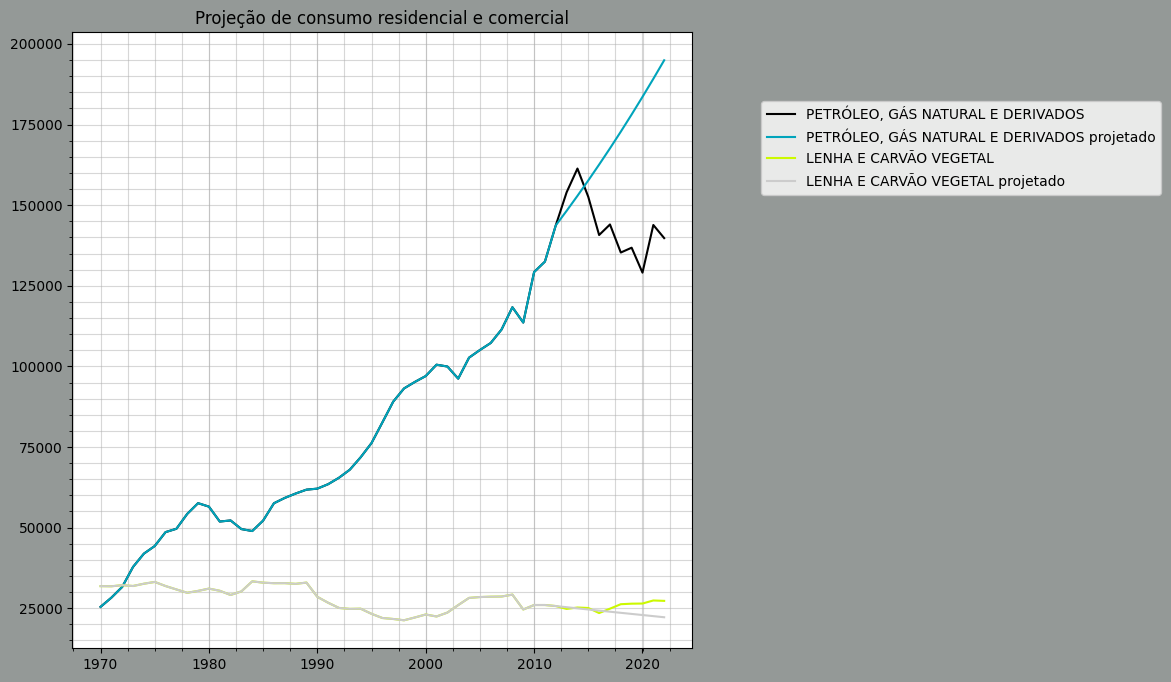

In [13]:
proj4 = df.projection_var(2012, [(2, 'PETRÓLEO, GÁS NATURAL E DERIVADOS'),
                               (2, 'LENHA E CARVÃO VEGETAL')],
                               'Projeção de consumo residencial e comercial')